# Min projekt om Stellar classification dataset


In [21]:
import pandas as pd

# Ladda CSV-filen
df = pd.read_csv('star_classification.csv')  # Om filen heter så
# df = pd.read_csv('sökväg/till/fil/stellar_classification.csv')  # Om filen ligger i en annan mapp

# Kolla de första raderna för att se att datan laddats rätt
print(df.head(23))

          obj_ID       alpha      delta         u         g         r  \
0   1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1   1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2   1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3   1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4   1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
5   1.237680e+18  340.995121  20.589476  23.48827  23.33776  21.32195   
6   1.237679e+18   23.234926  11.418188  21.46973  21.17624  20.92829   
7   1.237679e+18    5.433176  12.065186  22.24979  22.02172  20.34126   
8   1.237661e+18  200.290475  47.199402  24.40286  22.35669  20.61032   
9   1.237671e+18   39.149691  28.102842  21.74669  20.03493  19.17553   
10  1.237680e+18  328.092076  18.220310  25.77163  22.52042  20.63884   
11  1.237662e+18  243.986637  25.738280  23.76761  23.79969  20.98318   
12  1.237681e+18  345.801874  32.672868  23.17274  

Min första visualisering är en HR diagram som visar, Färg och Magnitud.

Antal NaN-värden i 'g': 0
Antal NaN-värden i 'r': 0


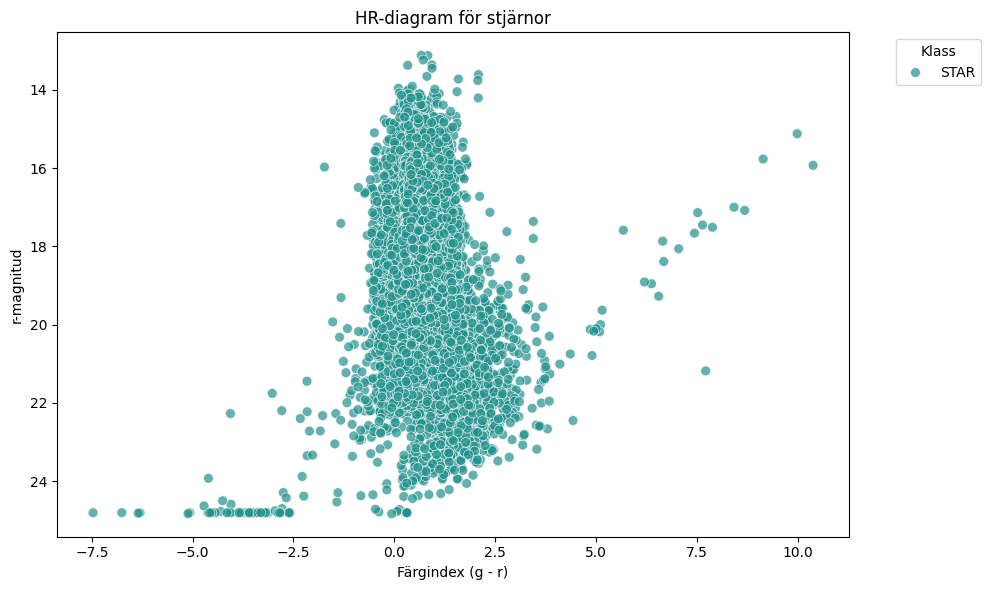

In [29]:
# Vi använder olika paket för att kunna jobba med data och rita diagram
import pandas as pd  # pandas hjälper oss att läsa och jobba med tabeller
import matplotlib.pyplot as plt  # matplotlib används för att rita diagram
import seaborn as sns  # seaborn gör fina diagram
import numpy as np  # numpy används för matteberäkningar

# Läser in datan från en fil som heter 'star_classification.csv'
df = pd.read_csv('star_classification.csv')

# Vi väljer bara de rader som handlar om stjärnor (klass = 'STAR')
stars_df = df[df['class'] == 'STAR'].copy()

# Här kollar vi om det finns några tomma värden i kolumnerna 'g' och 'r'
print("Antal NaN-värden i 'g':", stars_df['g'].isna().sum())  # Skriver ut hur många som saknas i g
print("Antal NaN-värden i 'r':", stars_df['r'].isna().sum())  # Skriver ut hur många som saknas i r

# Tar bort rader där värden saknas i 'g' eller 'r'
stars_df = stars_df.dropna(subset=['g', 'r'])

# Vi räknar ut färgindex för varje stjärna (g - r). Det visar färgen på stjärnan.
stars_df['color_index'] = stars_df['g'] - stars_df['r']

# Nu kollar vi om några värden i 'r' eller färgindex är konstiga (väldigt långt från medel)
# Vi räknar ut z-score som visar hur långt ett värde är från medelvärdet i antal standardavvikelser
z_score_r = np.abs((stars_df['r'] - stars_df['r'].mean()) / stars_df['r'].std())
z_score_color_index = np.abs((stars_df['color_index'] - stars_df['color_index'].mean()) / stars_df['color_index'].std())

# Tar bort de rader där z-score är mer än 3 (alltså jätteovanliga värden)
stars_df = stars_df[(z_score_r < 3) & (z_score_color_index < 3)]

# Nu ska vi rita ett HR-diagram (Hertzsprung-Russell-diagram)
# Det visar sambandet mellan stjärnans färg och ljusstyrka

plt.figure(figsize=(10, 6))  # Storleken på bilden

# Vi ritar en spridningsplot (punkter på ett diagram)
sns.scatterplot(
    data=stars_df,  # datan vi vill visa
    x='color_index',  # färgindex är på x-axeln
    y='r',  # ljusstyrka (r-magnitud) är på y-axeln
    hue='class',  # färgen på punkterna beror på vilken klass det är (även om vi bara har STAR)
    palette='viridis',  # färgtema
    alpha=0.7,  # genomskinligheten på punkterna
    s=50  # storleken på punkterna
)

# Sätter rubrik och namn på axlarna
plt.title('HR-diagram för stjärnor')  # Titeln på diagrammet
plt.xlabel('Färgindex (g - r)')  # Namn på x-axeln
plt.ylabel('r-magnitud')  # Namn på y-axeln

# Vänder på y-axeln så att ljusare stjärnor kommer högre upp
plt.gca().invert_yaxis()

# Visar en förklaring till färgerna (legend)
plt.legend(title='Klass', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gör att allt får plats snyggt i bilden
plt.tight_layout()

# Visar själva diagrammet
plt.show()


*Här min andra visualisering. En Heat map av korrelationer*

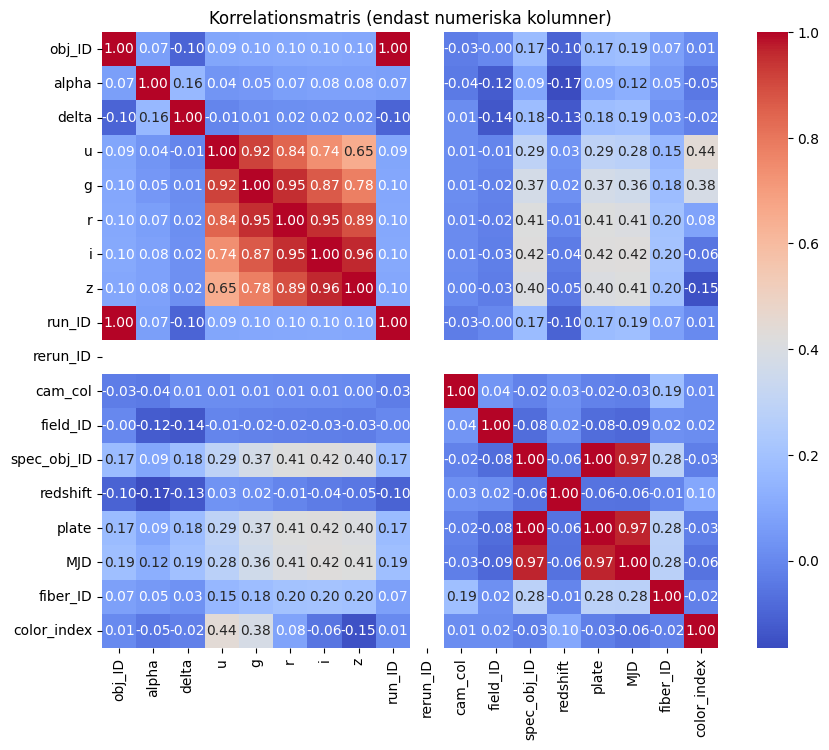

In [30]:
# Vi tar bort kolumner som inte innehåller siffror (t.ex. text) innan vi räknar ut korrelation
numeric_df = stars_df.select_dtypes(include=['number'])  # Vi väljer bara de kolumner som har nummer i sig

# Räknar ut korrelation mellan alla siffer-kolumner
# Korrelation visar hur starkt två saker hänger ihop, tex om en ökar när den andra ökar
corr_matrix = numeric_df.corr()

# Nu ska vi rita en heatmap som visar hur korrelerade kolumnerna är
plt.figure(figsize=(10, 8))  # Bestämmer hur stor bilden ska va

# Vi använder seaborn för att rita heatmapen
sns.heatmap(
    corr_matrix,         # Här är datan vi vill visa (korrelation mellan kolumner)
    annot=True,          # Skriv ut siffrorna i varje ruta
    fmt=".2f",           # Visa siffrorna med 2 decimaler
    cmap='coolwarm',     # Färgskala där blå = negativ och röd = positiv korrelation
    square=True          # Gör så att rutorna i matrisen blir kvadratiska
)

# Sätter en rubrik på bilden
plt.title('Korrelationsmatris (endast numeriska kolumner)')

# Visar hela bilden
plt.show()


# **Korrelationsmatris (Heatmap) för att se samband mellan siffror i stjärndatan**

Jag har gjort en modell som visar en så kallad **korrelationsmatris**, eller **"heatmap"**.  
Det är en färgkarta som visar **hur olika siffervärden i stjärndatan hänger ihop** med varandra.

Till exempel: Om två kolumner har höga värden samtidigt, får de en stark färg i kartan – det betyder att de har **hög korrelation**.



##  Men det blev lite problem...

Jag fick ett felmeddelande som såg ut så här:

ValueError: could not convert string to float: 'STAR' 


Det betyder att datorn försökte räkna med **text**, som till exempel `'STAR'`.  
Det går inte, eftersom funktionen `.corr()` bara fungerar med **siffror** (numeriska värden som `int` eller `float`).  
Min data innehöll kolumner som tex . `'class'` som har **textvärden**, och det ställde till det.



## Lösning – välj bara sifferkolumner

För att lösa detta, valde jag först ut **bara de kolumner som innehåller siffror**:

```python
numeric_df = stars_df.select_dtypes(include=['number'])


# **Mitt maskininlärningsprojekt handlar om att förutsäga stjärnors temperatur.**

Jag har skapat en modell som försöker räkna ut hur varm en stjärna är,  
genom att titta på olika fysiska egenskaper som:

 **Ljusstyrka** (hur starkt den lyser)  
 **Radie** (hur stor den är)  
 **Absolut magnitud** (hur ljus den egentligen är, inte bara hur den ser ut från jorden)  
 **Startyp** (t.ex. blå stjärna eller röd jätte)

Målet är att lära datorn känna igen mönster i datan så att den kan göra smarta gissningar om temperaturen på nya stjärnor.


# Utförlig beskrivning

## Vilken typ av problem har jag?

Jag arbetar med ett **regressionsproblem**.  
Det betyder att min modell ska förutsäga ett **kontinuerligt värde**, alltså en siffra.  
I mitt fall är det temperaturen hos stjärnor som ska förutsägas utifrån andra fysiska egenskaper.



## Vad är features och target?

**Features (ingångsvariabler)** är de data jag använder för att göra prediktioner.  
  I mitt projekt använder jag dessa features:
**Luminosity** (ljusstyrka)
**Radius** (radie)
**Absolutemagnitude** (absolut magnitud)
**Startype** (typ av stjärna, t.ex. "Red Giant")

**Target (målvariabeln)** är det värde jag vill förutsäga:  
**Temperature** (temperatur)



## Val av modell

För att lösa regressionsproblemet valde jag modellen **RandomForestRegressor**.  
Det är en modell som bygger på flera beslutsträd och ofta fungerar bra för att få bra precision utan att överanpassa sig till träningsexemplen.



## Träning och testdata

Jag delar upp min data i två delar:

**Träningsdata:** Den del som används för att lära modellen hur sambanden mellan features och target ser ut.
**Testdata:** En separat del som används för att utvärdera hur bra modellen fungerar på ny, osedd data.

Detta görs för att se till att modellen inte bara kan data den redan sett utan också kan göra bra prediktioner på nya exempel.



## Anpassa modellens resultat

Efter att modellen tränats använder jag olika mått för att bedöma hur bra den presterar.  
En vanlig måttstock är **R²-score**, som visar hur väl modellen kan förklara variationen i temperaturvärdena.

Ju närmare 1,0 R² är, desto bättre passar modellen data.  
Jag kan också justera modellens inställningar (t.ex. antal träd i RandomForest) för att förbättra resultatet.



Genom att följa dessa steg kan jag bygga en modell som på ett pålitligt sätt kan förutsäga stjärnors temperatur baserat på deras fysiska egenskaper.


 Steg 1: Läser in data...
Antal rader i datan: 100000
Vilka kolumner som finns: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']

 Steg 2: Räknar ut färgindex...

 Steg 3: Gissar avstånd och absolut ljusstyrka...

 Steg 4: Räknar ut hur starkt stjärnan lyser (luminositet)...

 Steg 5: Gissar temperatur från färgindex...

 Steg 6: Räknar ut radien...

 Steg 7: Skapar en ny kategori som visar typ av stjärna...

 Steg 8: Gör om stjärntyp till siffror...

 Steg 9: Tar bort rader som saknar viktiga värden...
Antal rader kvar efter städning: 99429

 Steg 10: Väljer vilka kolumner som ska användas för att gissa temperatur...

 Steg 11: Delar upp datan i träning och test...

 Steg 12: Tränar modellen...

 Steg 13: Gör gissningar med testdatan...

 R² Poäng: 0.00

 Visar resultatet i ett diagram...


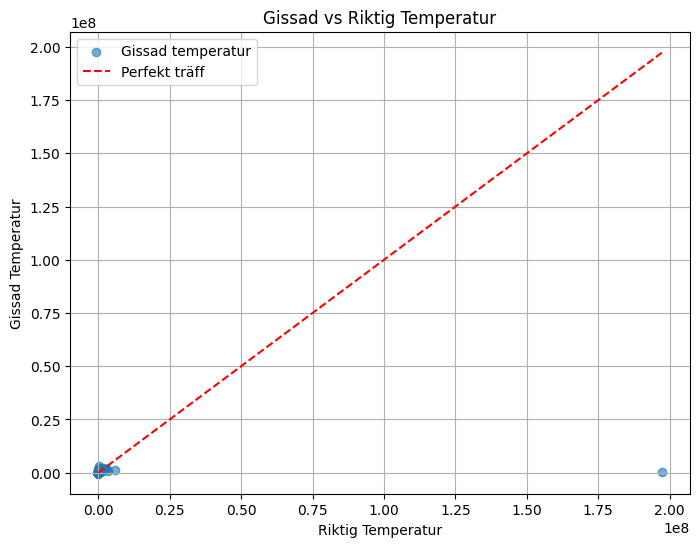


 Statistik för viktiga kolumner:
         ljusstyrka         radie   absolutljus    temperatur
count  9.942900e+04  9.942900e+04  99429.000000  9.942900e+04
mean   7.280581e-05  2.953515e-02     18.083673  8.714617e+03
std    4.559580e-03  2.022289e+00      3.500713  6.305395e+05
min    1.677788e-14  2.624240e-14      4.366090  1.530573e+02
25%    2.942621e-06  1.318007e-03     16.147437  1.908525e+03
50%    1.205018e-05  9.300024e-03     16.937516  3.146215e+03
75%    2.494739e-05  3.356371e-02     18.468164  6.229200e+03
max    1.286957e+00  6.308904e+02     39.078158  1.972471e+08


In [31]:
# Den här raden gör att diagram visas direkt i Jupyter
%matplotlib inline

# Vi importerar olika verktyg vi behöver
import pandas as pd  # pandas hjälper oss att jobba med tabeller
import numpy as np  # numpy används för matte och logaritmer mm
import matplotlib.pyplot as plt  # matplotlib används för att rita diagram

# Sklearn är ett verktyg för maskininlärning (att lära datorn göra gissningar)
from sklearn.ensemble import RandomForestRegressor  # Vi använder en skog av beslutsträd för att gissa temperatur
from sklearn.model_selection import train_test_split  # För att dela upp data i träning och test
from sklearn.metrics import r2_score  # För att se hur bra modellen gissade

print(" Steg 1: Läser in data...")
data = pd.read_csv('star_classification.csv')  # Läser in filen med stjärndata
print("Antal rader i datan:", len(data))
print("Vilka kolumner som finns:", data.columns.tolist())

# Kollar att kolumnerna 'g' och 'r' verkligen finns i datan
if 'g' not in data.columns or 'r' not in data.columns:
    raise KeyError("Kolumnerna 'g' eller 'r' saknas i datan.")

print("\n Steg 2: Räknar ut färgindex...")
data['fargindex'] = data['g'] - data['r']  # Färgindex = g - r

print("\n Steg 3: Gissar avstånd och absolut ljusstyrka...")
data['avstand'] = 100 * data['redshift'] + 1  # Enkel modell för avstånd
data['absolutljus'] = data['r'] - 5 * np.log10(data['avstand']) + 5  # Absolut magnitud

print("\n Steg 4: Räknar ut hur starkt stjärnan lyser (luminositet)...")
solens_magnitud = 4.64
data['ljusstyrka'] = 10 ** (0.4 * (solens_magnitud - data['absolutljus']))  # Hur starkt den lyser jämfört med solen

print("\n Steg 5: Gissar temperatur från färgindex...")
# Enkel modell där man räknar ut temperatur beroende på färgindex
data['temperatur'] = np.where(
    (data['fargindex'] + 0.37) > 0,
    4400 * (data['fargindex'] + 0.37) ** (-1.25),
    np.nan  # Om det inte går att räkna så blir det NaN
)

print("\n Steg 6: Räknar ut radien...")
sol_temp = 5778  # Solens temperatur i Kelvin
data['radie'] = np.sqrt(data['ljusstyrka']) / ((data['temperatur'] / sol_temp) ** 2)

print("\n Steg 7: Skapar en ny kategori som visar typ av stjärna...")
# Vi kollar om färgen är blå eller röd och skapar en typ
villkor = [
    (data['class'] == 'STAR') & (data['fargindex'] < 0.4),
    (data['class'] == 'STAR') & (data['fargindex'] >= 0.4),
]
typer = ['Blå Huvudserien', 'Röd Jätte']  # Två typer av stjärnor
data['stjarn_typ'] = np.select(villkor, typer, default='Annan')

print("\n Steg 8: Gör om stjärntyp till siffror...")
data = pd.get_dummies(data, columns=['stjarn_typ'], drop_first=True)  # Gör kolumner för varje typ

print("\n Steg 9: Tar bort rader som saknar viktiga värden...")
# Vi vill inte ha med rader som saknar temperatur, ljus, radie eller magnitud
data = data.dropna(subset=['temperatur', 'ljusstyrka', 'radie', 'absolutljus'])
print(f"Antal rader kvar efter städning: {len(data)}")

print("\n Steg 10: Väljer vilka kolumner som ska användas för att gissa temperatur...")
X = data[['ljusstyrka', 'radie', 'absolutljus', 'stjarn_typ_Röd Jätte']]  # De saker vi använder för att gissa
y = data['temperatur']  # Det vi vill gissa

print("\n Steg 11: Delar upp datan i träning och test...")
X_traning, X_test, y_traning, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n Steg 12: Tränar modellen...")
modell = RandomForestRegressor(n_estimators=100, random_state=42)  # Vi bygger modellen
modell.fit(X_traning, y_traning)  # Lär modellen med träningsdata

print("\n Steg 13: Gör gissningar med testdatan...")
y_gissat = modell.predict(X_test)  # Modellen gissar temperatur
poang = r2_score(y_test, y_gissat)  # Vi mäter hur nära sanningen den kom
print(f"\n R² Poäng: {poang:.2f}")  # Visar hur bra modellen presterar

print("\n Visar resultatet i ett diagram...")
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_gissat, alpha=0.6, label="Gissad temperatur")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfekt träff")
plt.xlabel('Riktig Temperatur')
plt.ylabel('Gissad Temperatur')
plt.title('Gissad vs Riktig Temperatur')
plt.legend()
plt.grid(True)
plt.show()

print("\n📈 Statistik för viktiga kolumner:")
print(data[['ljusstyrka', 'radie', 'absolutljus', 'temperatur', 'stjarn_typ_Röd Jätte']].describe())


In [32]:
# Vi använder pandas för att jobba med data i tabell-form
import pandas as pd  # "pd" är bara ett kort namn så vi slipper skriva pandas hela tiden

# Försöker läsa in en fil som heter "star_classification.csv"
# Det är en CSV-fil (kommaseparerad fil) som innehåller data om stjärnor
df = pd.read_csv('star_classification.csv')  # Läser in filen och sparar den i en variabel som vi kallar "df" (dataframe)

# Skriver ut hur många rader det finns i datan
print("Antal rader i dataset:", len(df))  # len(df) räknar hur många rader det är

# Skriver ut vilka kolumner som finns, alltså vilka typer av data som finns i varje rad
print("Tillgängliga kolumner:", df.columns.tolist())  # .columns listar alla kolumnnamn


Antal rader i dataset: 100000
Tillgängliga kolumner: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']


# **Men för att den ska funka så behöver jag lägga till nya kolumner:**  
**Luminosity:** ljustyrka  
**Radius:** radie  
**Absolutemagnitude:** absolut magnitud  
**Temperature:** temperatur  
**Startype:** tex: "vit dvärg" osv


In [33]:
# Vi börjar med att importera två viktiga paket
import pandas as pd  # För att läsa och jobba med tabeller
import numpy as np  # För matte, t.ex. logaritmer och potenser

# 1. Läser in stjärn-datan från en CSV-fil
df = pd.read_csv('star_classification.csv')  # Vi sparar datan i "df"

# 2. Skriver ut vilka kolumner som finns i filen
print("Tillgängliga kolumner:", df.columns.tolist())  # .columns visar namnen på kolumnerna

# 3. Räknar ut färgindex (skillnaden mellan g och r-filter)
# Vi kollar först att båda kolumnerna verkligen finns
if 'g' in df.columns and 'r' in df.columns:
    df['fargindex'] = df['g'] - df['r']  # Ny kolumn som visar färg
else:
    raise KeyError("Kolumnerna 'g' eller 'r' saknas i datan.")

# 4. Försöker räkna ut absolut ljusstyrka (hur starkt den lyser om den vore på 10 parsec)
if 'distance' in df.columns:
    # Om det redan finns ett avstånd använder vi det
    df['absolutljus'] = df['r'] - 5 * np.log10(df['distance']) + 5
else:
    # Om inte, så gissar vi avståndet med hjälp av "redshift" (hur mycket ljuset förskjutits)
    df['distance'] = 100 * df['redshift'] + 1  # Enkel gissning för avstånd i parsec
    df['absolutljus'] = df['r'] - 5 * np.log10(df['distance']) + 5  # Räknar absolut magnitud

# 5. Räknar ut hur starkt stjärnan lyser (relativt mot solen)
solens_magnitud = 4.64
df['ljusstyrka'] = 10 ** (0.4 * (solens_magnitud - df['absolutljus']))  # Luminositet i sol-enheter

# 6. Gissar temperaturen med hjälp av färgindex
# Formeln är framtagen från mätningar och är inte exakt
df['temperatur'] = 4400 * ((df['g'] - df['r']) + 0.37) ** (-1.25)  # Temperatur i Kelvin

# 7. Räknar ut radien (hur stor stjärnan är jämfört med solen)
soltemp = 5778  # Solens temperatur
df['radie'] = np.sqrt(df['ljusstyrka']) / ((df['temperatur'] / soltemp) ** 2)

# 8. Skapar en ny kolumn som visar vilken typ av stjärna det är
# Vi använder färgen för att säga om det är en blå eller röd stjärna
villkor = [
    (df['class'] == 'STAR') & (df['fargindex'] < 0.4),  # Blå
    (df['class'] == 'STAR') & (df['fargindex'] >= 0.4),  # Röd
]
val = ['Blå Huvudserien', 'Röd Jätte']
df['stjarn_typ'] = np.select(villkor, val, default='Annat')  # Annat om det inte passar in

# 9. Skriver ut de nya kolumnerna vi lagt till (för att titta att det blev rätt)
print("\nNya kolumner vi har skapat:")
print(df[['fargindex', 'absolutljus', 'ljusstyrka', 'temperatur', 'radie', 'stjarn_typ']].head())

# 10. Spara all data i en ny CSV-fil så vi kan använda den igen senare
df.to_csv('star_classification_with_features.csv', index=False)  # Sparar utan radnummer



Tillgängliga kolumner: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']

Nya kolumner vi har skapat:
   fargindex  absolutljus  ljusstyrka   temperatur     radie stjarn_typ
0    1.88029    16.347906    0.000021  1596.447215  0.059657      Annat
1    0.24744    18.098681    0.000004  8039.133208  0.001051      Annat
2    2.05413    16.531226    0.000018  1454.647596  0.066038      Annat
3    2.16494    16.740569    0.000014  1375.602863  0.067059      Annat
4    1.08281    15.993504    0.000029  2758.618541  0.023522      Annat
